In [ ]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=9a1b77bc706fee9542bbe9a3f56a464941406c0ebfb2ba962060c11d5517c3c4
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


# Nueva sección

In the crop recommendation, the user can provide the parameters like N-P-K, temperature, humidity, pH value, rainfall, crop from their side and the application will predict which crop should the user grow.

* Nitrogen (N) – Nitrogen is largely responsible for the growth of leaves on the plant.
* Phosphorus (P) – Phosphorus is largely responsible for root growth and flower and fruit development.
* Potassium (K) – Potassium is a nutrient that helps the overall functions of the plant perform correctly.

In [ ]:
from __future__ import print_function
import pandas as pd # data analysis
import numpy as np # linear algebra

#import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from pandasql import sqldf
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
import random

warnings.filterwarnings('ignore')
sql = lambda q: sqldf(q, globals())

In [ ]:
crop = pd.read_csv('/content/Crop_recommendation.csv')

In [ ]:
crop = crop.query('label != "apple" and label != "banana"and label != "mango"and label != "orange"')

In [ ]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
ganado = pd.read_excel('/content/Pasto_ganad.xlsx')
ganado

,Nombre,Ganancia_agua,Ganancia_seco
0,Tanzania,610 a 800,300 a 315
1,Mombasa,459 a 570,130 a 350
2,Masai,400 a 585,0 a 260
3,Zuri,540 a 544,271 a 250
4,Tamani,808,275
5,Quenia,554 a 700,258 a 643
6,Marandu,610 a 800,300 a 315
7,Xaraes,560 a 670,250 a 280
8,Piata,590 a 720,380
9,Paiaguas,600 a 640,420


In [ ]:
len(crop['label'].unique())

18

In [ ]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'grapes', 'watermelon', 'muskmelon', 'papaya', 'coconut', 'cotton',
       'jute', 'coffee'], dtype=object)

In [ ]:
for i in range(len(ganado['Nombre'].unique())):
  print('"',crop['label'].unique()[i],'":"',ganado['Nombre'][i],'",')

" rice ":" Tanzania ",
" maize ":" Mombasa ",
" chickpea ":" Masai ",
" kidneybeans ":" Zuri ",
" pigeonpeas ":" Tamani ",
" mothbeans ":" Quenia ",
" mungbean ":" Marandu ",
" blackgram ":" Xaraes ",
" lentil ":" Piata ",
" pomegranate ":" Paiaguas ",
" grapes ":" Ipypora ",
" watermelon ":" Basilisco ",
" muskmelon ":" Dictyoneura ",
" papaya ":" Tuly ",
" coconut ":" Tupi ",
" cotton ":" Ruziziensis ",
" jute ":" Integra ",
" coffee ":" Kurumi ",


In [ ]:
propiedades_dic_encod = {
    "rice":"Tanzania",
    "maize":"Mombasa",
    "chickpea":"Masai",
    "kidneybeans":"Zuri",
    "pigeonpeas":"Tamani",
    "mothbeans":"Quenia",
    "mungbean":"Marandu",
    "blackgram":"Xaraes",
    "lentil":"Piata",
    "pomegranate":"Paiaguas",
    "grapes":"Ipypora",
    "watermelon":"Basilisco",
    "muskmelon":"Dictyoneura",
    "papaya":"Tuly",
    "coconut":"Tupi",
    "cotton":"Ruziziensis",
    "jute":"Integra",
    "coffee":"Kurumi"    
}
    
crop.replace({"label": propiedades_dic_encod},inplace=True)

In [ ]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Tanzania
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Tanzania
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Tanzania
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Tanzania
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Tanzania
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Kurumi
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Kurumi
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Kurumi
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Kurumi


In [ ]:
data = sql('select N,P,K,temperature,humidity,ph,rainfall,Ganancia_agua,Ganancia_seco,label	from crop,ganado where crop.label=ganado.Nombre')
for i in range(len(data)):
  campo = data['Ganancia_agua'][i].split()
  campo1 = data['Ganancia_seco'][i].split()
  if len(campo)==1:
    data['Ganancia_agua'][i]=campo[0]
  else:
    data['Ganancia_agua'][i]=round(random.uniform(int(campo[0]),int(campo[2])))
  if len(campo1)==1:
    data['Ganancia_seco'][i]=campo1[0]
  else:
    data['Ganancia_seco'][i]=round(random.uniform(int(campo1[0]),int(campo1[2])))

data

,N,P,K,temperature,humidity,ph,rainfall,Ganancia_agua,Ganancia_seco,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,620,304,Tanzania
1,85,58,41,21.770462,80.319644,7.038096,226.655537,688,312,Tanzania
2,60,55,44,23.004459,82.320763,7.840207,263.964248,633,310,Tanzania
3,74,35,40,26.491096,80.158363,6.980401,242.864034,767,305,Tanzania
4,78,42,42,20.130175,81.604873,7.628473,262.717340,739,305,Tanzania
...,...,...,...,...,...,...,...,...,...,...
1795,107,34,32,26.774637,66.413269,6.780064,177.774507,738,813,Kurumi
1796,99,15,27,27.417112,56.636362,6.086922,127.924610,709,847,Kurumi
1797,118,33,30,24.131797,67.225123,6.362608,173.322839,853,755,Kurumi
1798,117,32,34,26.272418,52.127394,6.758793,127.175293,819,743,Kurumi


In [ ]:
data

,N,P,K,temperature,humidity,ph,rainfall,Ganancia_agua,Ganancia_seco,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,620,304,Tanzania
1,85,58,41,21.770462,80.319644,7.038096,226.655537,688,312,Tanzania
2,60,55,44,23.004459,82.320763,7.840207,263.964248,633,310,Tanzania
3,74,35,40,26.491096,80.158363,6.980401,242.864034,767,305,Tanzania
4,78,42,42,20.130175,81.604873,7.628473,262.717340,739,305,Tanzania
...,...,...,...,...,...,...,...,...,...,...
1795,107,34,32,26.774637,66.413269,6.780064,177.774507,738,813,Kurumi
1796,99,15,27,27.417112,56.636362,6.086922,127.924610,709,847,Kurumi
1797,118,33,30,24.131797,67.225123,6.362608,173.322839,853,755,Kurumi
1798,117,32,34,26.272418,52.127394,6.758793,127.175293,819,743,Kurumi


In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1800 non-null   int64  
 1   P            1800 non-null   int64  
 2   K            1800 non-null   int64  
 3   temperature  1800 non-null   float64
 4   humidity     1800 non-null   float64
 5   ph           1800 non-null   float64
 6   rainfall     1800 non-null   float64
 7   label        1800 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 126.6+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N              1800 non-null   int64  
 1   P              1800 non-null   int64  
 2   K              1800 non-null   int64  
 3   temperature    1800 non-null   float64
 4   humidity       1800 non-null   float64
 5   ph             1800 non-null   float64
 6   rainfall       1800 non-null   float64
 7   Ganancia_agua  1800 non-null   object 
 8   Ganancia_seco  1800 non-null   object 
 9   label          1800 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 140.8+ KB


In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,52.858889,50.778889,42.745000,25.531952,69.865603,6.535093,102.985510
std,36.585430,28.061633,41.528977,4.997346,22.903632,0.775158,60.580169
min,0.000000,5.000000,15.000000,8.825675,14.258040,3.504752,20.211267
25%,23.000000,30.000000,20.000000,22.804735,60.261953,6.056688,57.798107
50%,40.000000,51.000000,30.000000,25.506858,79.631415,6.502830,81.017378
75%,85.000000,64.000000,47.000000,28.298211,87.456973,6.968597,145.383970
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
crop.shape

(1800, 8)

In [ ]:
crop['label'].unique()

array(['Tanzania', 'Mombasa', 'Masai', 'Zuri', 'Tamani', 'Quenia',
       'Marandu', 'Xaraes', 'Piata', 'Paiaguas', 'Ipypora', 'Basilisco',
       'Dictyoneura', 'Tuly', 'Tupi', 'Ruziziensis', 'Integra', 'Kurumi'],
      dtype=object)

In [ ]:
crop['label'].value_counts()

Tanzania       100
Mombasa        100
Integra        100
Ruziziensis    100
Tupi           100
Tuly           100
Dictyoneura    100
Basilisco      100
Ipypora        100
Paiaguas       100
Piata          100
Xaraes         100
Marandu        100
Quenia         100
Tamani         100
Zuri           100
Masai          100
Kurumi         100
Name: label, dtype: int64

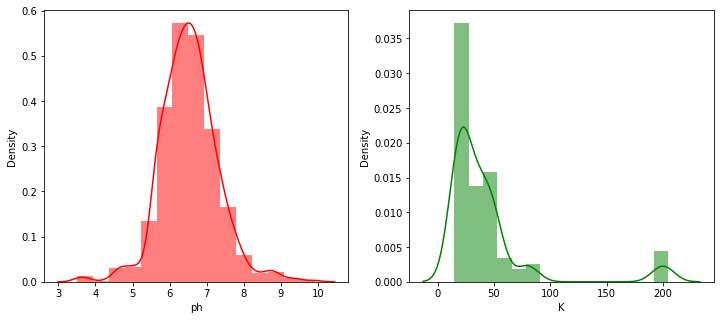

In [ ]:

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.distplot(crop['ph'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 2, 2)
sns.distplot(crop['K'],color="green",bins=15,hist_kws={'alpha':0.5})

In [ ]:
#sns.pairplot(crop,hue = 'label')

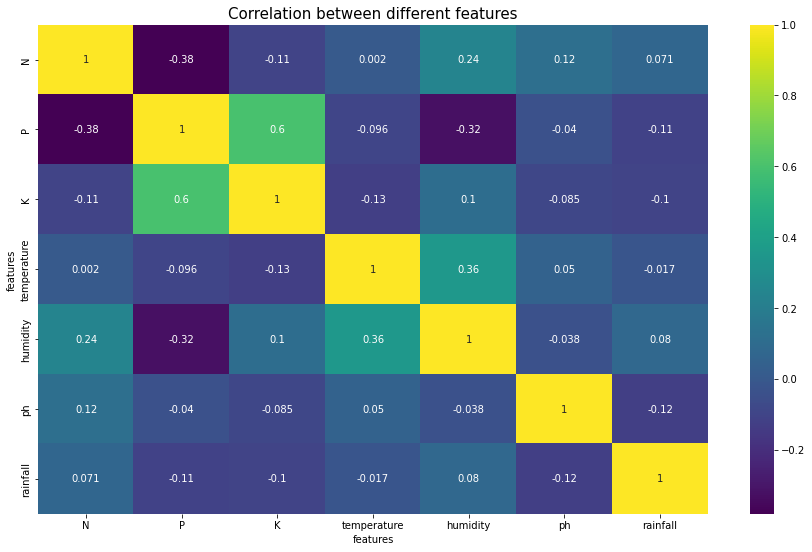

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(crop.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [ ]:
crop_summary = pd.pivot_table(crop,index=['label'],aggfunc='mean')
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
Basilisco,50.22,99.42,17.00,85.160375,6.495778,50.786219,25.591767
Dictyoneura,50.08,100.32,17.72,92.342802,6.358805,24.689952,28.663066
Integra,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376
Ipypora,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
Kurumi,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
Marandu,19.87,20.99,47.28,85.499975,6.723957,48.403601,28.525775
Masai,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
Mombasa,19.79,77.76,48.44,65.092249,6.245190,84.766988,22.389204
Paiaguas,40.21,18.87,18.75,90.125504,6.429172,107.528442,21.837842


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='mediumvioletred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='springgreen'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='dodgerblue'
))

fig.update_layout(title="N-P-K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [ ]:
data.isnull().sum()

N                0
P                0
K                0
temperature      0
humidity         0
ph               0
rainfall         0
Ganancia_agua    0
Ganancia_seco    0
label            0
dtype: int64

In [ ]:
features = data[data.columns[:len(data.columns)-1].values]
target = data['label']

In [ ]:

from sklearn.preprocessing import StandardScaler
  
scaler = StandardScaler()
model = scaler.fit(features)
scaled_data = model.transform(features)
  
features = pd.DataFrame(scaled_data)

In [ ]:
data.columns[:len(data.columns)-1].values

array(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
       'Ganancia_agua', 'Ganancia_seco'], dtype=object)

In [ ]:
acc = []
model = []

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2)#,random_state =1067879307)

In [ ]:
print(f"Train Data: {x_train.shape}, {y_train.shape}")
print(f"Test Data: {x_test.shape}, {y_test.shape}")

Train Data: (1440, 9), (1440,)
Test Data: (360, 9), (360,)


In [ ]:
x_train

,0,1,2,3,4,5,6,7,8
589,-0.351573,-0.205993,-0.596015,0.981771,-0.640268,-1.643743,-1.189917,-0.124935,0.984738
1657,0.988130,-0.384222,0.006142,0.142789,0.135666,0.760001,1.436275,-1.374952,-0.911990
151,0.660039,-0.526805,-0.475583,-0.163688,-0.573489,0.146633,-0.239945,-0.237969,-0.327877
250,-0.269551,1.005963,0.873248,-1.225878,-2.222330,1.640965,-0.375390,-0.317757,-1.450162
859,-0.816368,0.863380,-0.620101,-0.131646,-0.256077,0.855525,-0.903255,0.905664,0.525323
...,...,...,...,...,...,...,...,...,...
606,-0.515619,0.293048,-0.475583,0.606524,0.584478,0.517085,-0.767838,1.271360,0.065908
1192,0.824085,-1.025845,0.271091,0.073193,0.528493,-0.332731,-0.800582,-1.434793,-0.688845
1737,1.835697,-0.384222,-0.234721,-0.258898,-0.679658,0.256809,0.200961,1.224817,2.796146
597,-0.542960,-0.134701,-0.620101,-0.132890,-0.942920,2.692354,-0.645056,0.373742,0.210295


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  0.9722222222222222
              precision    recall  f1-score   support

   Basilisco       1.00      1.00      1.00        16
 Dictyoneura       1.00      1.00      1.00        24
     Integra       1.00      1.00      1.00        15
     Ipypora       1.00      1.00      1.00        26
      Kurumi       1.00      1.00      1.00        18
     Marandu       0.96      1.00      0.98        23
       Masai       1.00      1.00      1.00        21
     Mombasa       1.00      1.00      1.00        17
    Paiaguas       1.00      1.00      1.00        21
       Piata       0.83      0.97      0.89        30
      Quenia       1.00      0.53      0.69        19
 Ruziziensis       1.00      1.00      1.00        14
      Tamani       1.00      1.00      1.00        18
    Tanzania       1.00      1.00      1.00        24
        Tuly       1.00      1.00      1.00        16
        Tupi       1.00      1.00      1.00        17
      Xaraes       0.93      1.00      0.96 

In [ ]:
score = cross_val_score(knn,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.97222222 0.98055556 0.97222222 0.97777778 0.97777778]


In [ ]:
#Print Train Accuracy
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test))

knn_train_accuracy =  0.9777777777777777
knn_test_accuracy =  0.9722222222222222


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",max_depth=5,max_features=5 )#,random_state=2)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  98.05555555555556
              precision    recall  f1-score   support

   Basilisco       1.00      0.94      0.97        16
 Dictyoneura       1.00      1.00      1.00        24
     Integra       1.00      1.00      1.00        15
     Ipypora       1.00      1.00      1.00        26
      Kurumi       1.00      1.00      1.00        18
     Marandu       1.00      1.00      1.00        23
       Masai       1.00      1.00      1.00        21
     Mombasa       1.00      1.00      1.00        17
    Paiaguas       1.00      1.00      1.00        21
       Piata       0.94      1.00      0.97        30
      Quenia       1.00      0.68      0.81        19
 Ruziziensis       1.00      1.00      1.00        14
      Tamani       1.00      1.00      1.00        18
    Tanzania       1.00      1.00      1.00        24
        Tuly       1.00      1.00      1.00        16
        Tupi       0.94      1.00      0.97        17
      Xaraes       0.87      1.00

In [ ]:
score = cross_val_score(DT, features, target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.93888889 0.98055556 0.98888889 0.98055556 0.96944444]


In [ ]:
#Print Train Accuracy
dt_train_accuracy = DT.score(x_train,y_train)
print("Training accuracy = ",DT.score(x_train,y_train))
#Print Test Accuracy
dt_test_accuracy = DT.score(x_test,y_test)
print("Testing accuracy = ",DT.score(x_test,y_test))

Training accuracy =  0.9972222222222222
Testing accuracy =  0.9805555555555555


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=4,max_features=2)#, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.9888888888888889
              precision    recall  f1-score   support

   Basilisco       1.00      1.00      1.00        16
 Dictyoneura       1.00      1.00      1.00        24
     Integra       1.00      1.00      1.00        15
     Ipypora       1.00      1.00      1.00        26
      Kurumi       1.00      1.00      1.00        18
     Marandu       0.96      1.00      0.98        23
       Masai       1.00      1.00      1.00        21
     Mombasa       1.00      1.00      1.00        17
    Paiaguas       1.00      1.00      1.00        21
       Piata       1.00      0.93      0.97        30
      Quenia       0.94      0.89      0.92        19
 Ruziziensis       1.00      1.00      1.00        14
      Tamani       0.95      1.00      0.97        18
    Tanzania       1.00      1.00      1.00        24
        Tuly       1.00      1.00      1.00        16
        Tupi       1.00      1.00      1.00        17
      Xaraes       0.96      1.00 

In [ ]:
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99722222 0.99722222 0.98888889 0.99444444 0.98888889]


In [ ]:
#Print Train Accuracy
rf_train_accuracy = RF.score(x_train,y_train)
print("Training accuracy = ",RF.score(x_train,y_train))
#Print Test Accuracy
rf_test_accuracy = RF.score(x_test,y_test)
print("Testing accuracy = ",RF.score(x_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.9888888888888889
